In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout,Embedding
import scipy.stats as stats
from tensorflow.keras.optimizers import Adam

In [34]:
data=pd.read_csv("dataset.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
data=data.drop(["customerID"],axis=1)

In [37]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Handling Null Values

In [38]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [39]:
data["TotalCharges"]=data["TotalCharges"].fillna(data["MonthlyCharges"].mean())

In [40]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
data.duplicated().sum()

22

# Handling Duplicated Data

In [42]:
data=data.drop_duplicates()

In [43]:
data.duplicated().sum()

0

In [44]:
data["Churn"].value_counts()

Churn
No     5164
Yes    1857
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

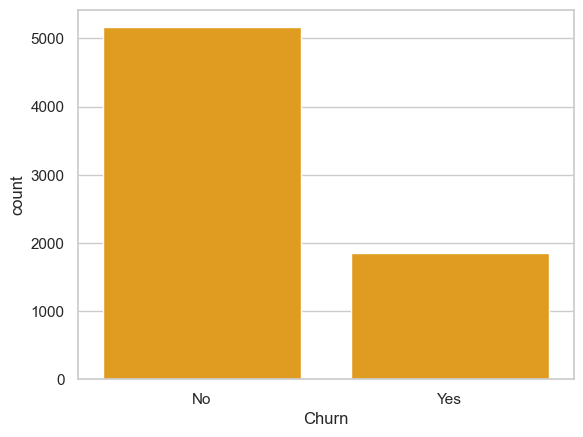

In [45]:
sns.countplot(x="Churn",data=data,color="orange")

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [48]:
data["MultipleLines"]=data["MultipleLines"].replace({"No phone service":"No"})

In [49]:
data["InternetService"].value_counts()

InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64

In [50]:
data["InternetService"]=data["InternetService"].replace({0:"None"})
data["InternetService"].value_counts()

InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64

In [51]:
data["Churn"]=data["Churn"].replace({"Yes":1,"No":0})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_22411/4043661326.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Churn"]=data["Churn"].replace({"Yes":1,"No":0})


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

# Label Encoder

In [53]:
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])

In [54]:
data.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [55]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,32.534254,0.902863,0.423159,0.870816,0.790486,0.907278,0.905284,0.797607,0.986469,0.993591,0.692636,0.592651,1.570716,64.851894,2286.866490,0.264492
std,0.500017,0.368947,0.499797,0.458520,25.052563,0.296166,0.494095,0.737076,0.860730,0.880999,0.880787,0.862432,0.885762,0.885842,0.834163,0.491376,1.067530,30.069001,2266.754132,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.750000,403.350000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.400000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.900000,3801.700000,1.000000
max,1.000000,1.000000,1.000000,1.000000,458.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# EDA 

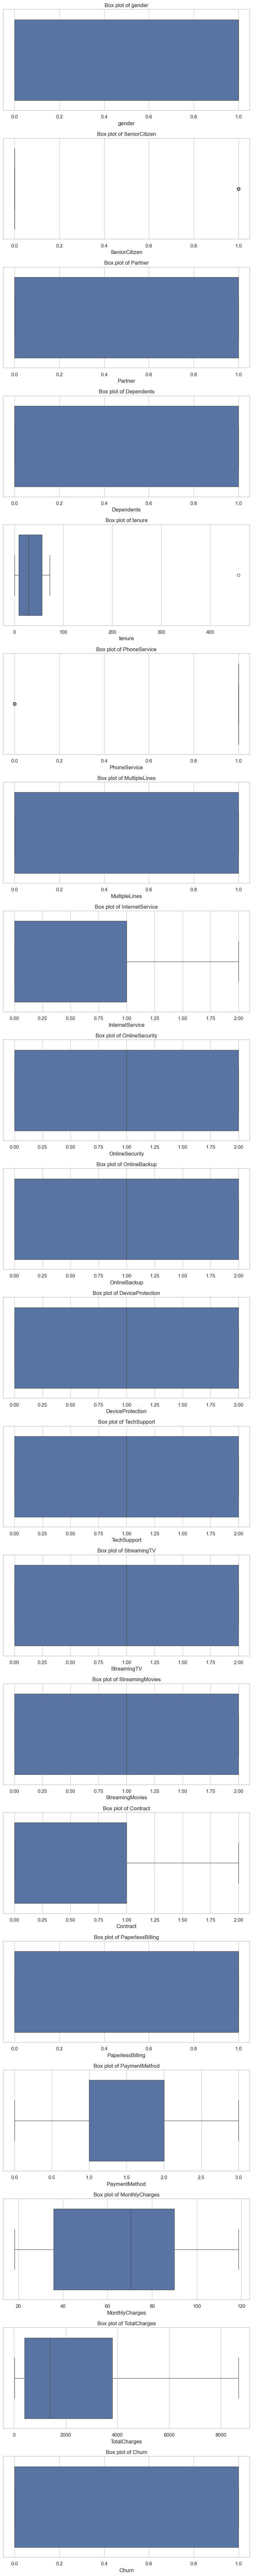

In [56]:
fig, axes = plt.subplots(len(data.select_dtypes(include=['float64', 'int64']).columns), 1, figsize=(8, 4*len(data.select_dtypes(include=['float64', 'int64']).columns)))

for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f"Box plot of {column}")

plt.tight_layout()
plt.show()

# Remove Outliers

In [57]:
data = data[data['tenure'] <= 400]

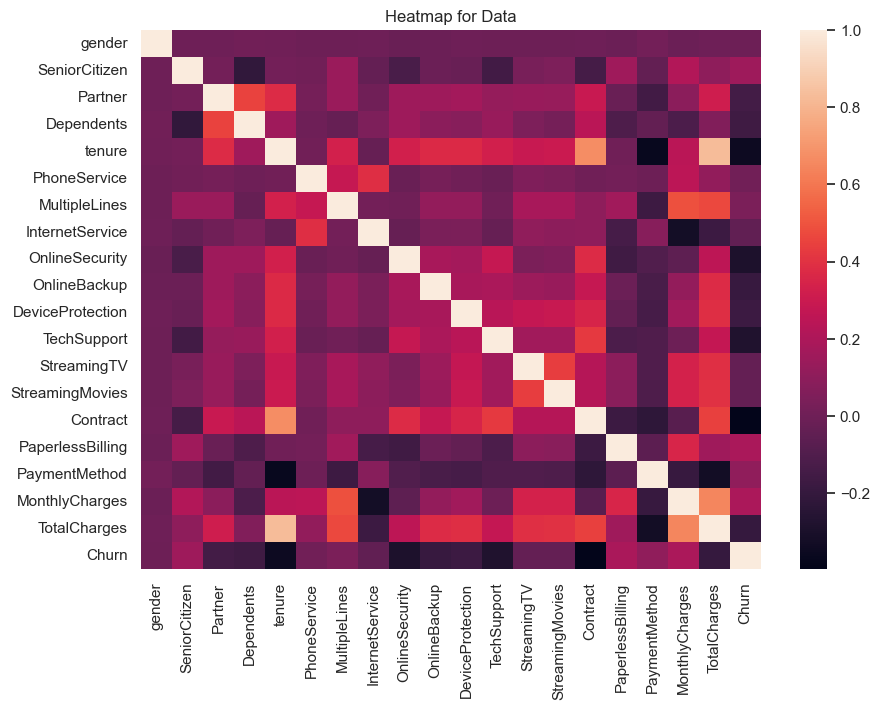

In [58]:
plt.figure(figsize=(10,7))
plt.title("Heatmap for Data")
sns.heatmap(data.corr())
plt.show()

In [59]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001188,-0.001153,0.010988,0.006014,-0.006723,-0.007854,-0.001933,-0.015396,-0.012006,0.000302,-0.006846,-0.006297,-0.008619,0.000692,-0.011232,0.016363,-0.013109,0.000622,-0.008850
SeniorCitizen,-0.001188,1.000000,0.015493,-0.212166,0.015275,0.008929,0.142313,-0.031298,-0.128334,-0.013599,-0.021515,-0.151285,0.030779,0.047285,-0.143685,0.156258,-0.037296,0.219460,0.102178,0.151587
Partner,-0.001153,0.015493,1.000000,0.451613,0.377244,0.018775,0.139733,0.003505,0.150481,0.152716,0.165633,0.126640,0.136623,0.128813,0.292961,-0.015663,-0.152026,0.094356,0.315411,-0.149231
Dependents,0.010988,-0.212166,0.451613,1.000000,0.157512,-0.001061,-0.026406,0.046504,0.151912,0.090631,0.079928,0.133455,0.046253,0.020633,0.241854,-0.112152,-0.038149,-0.116164,0.060174,-0.163524
tenure,0.006014,0.015275,0.377244,0.157512,1.000000,0.009843,0.329646,-0.027054,0.325658,0.371115,0.370953,0.323513,0.288989,0.296477,0.670688,0.005195,-0.367800,0.245338,0.825551,-0.351656
PhoneService,-0.006723,0.008929,0.018775,-0.001061,0.009843,1.000000,0.280992,0.387646,-0.014984,0.024384,0.004091,-0.019048,0.055759,0.044273,0.003140,0.016786,-0.005323,0.248972,0.114466,0.011351
MultipleLines,-0.007854,0.142313,0.139733,-0.026406,0.329646,0.280992,1.000000,0.013472,0.001719,0.119445,0.117858,0.004954,0.184132,0.186341,0.105040,0.163366,-0.168645,0.489611,0.467062,0.041888
InternetService,-0.001933,-0.031298,0.003505,0.046504,-0.027054,0.387646,0.013472,1.000000,-0.029580,0.035952,0.044398,-0.026791,0.107721,0.098645,0.102332,-0.136937,0.082746,-0.320501,-0.173787,-0.047473
OnlineSecurity,-0.015396,-0.128334,0.150481,0.151912,0.325658,-0.014984,0.001719,-0.029580,1.000000,0.184405,0.174950,0.284494,0.043709,0.055004,0.374488,-0.156932,-0.096922,-0.053306,0.253159,-0.288608
OnlineBackup,-0.012006,-0.013599,0.152716,0.090631,0.371115,0.024384,0.119445,0.035952,0.184405,1.000000,0.186976,0.194642,0.145898,0.135414,0.280849,-0.012713,-0.124811,0.120344,0.374535,-0.194135


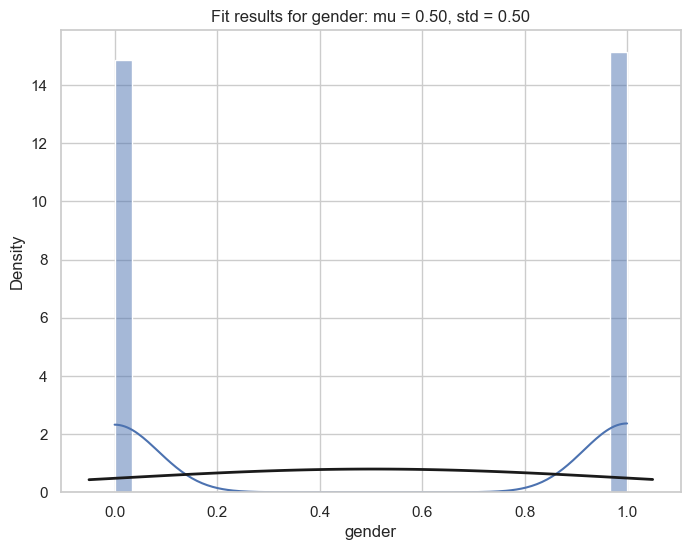

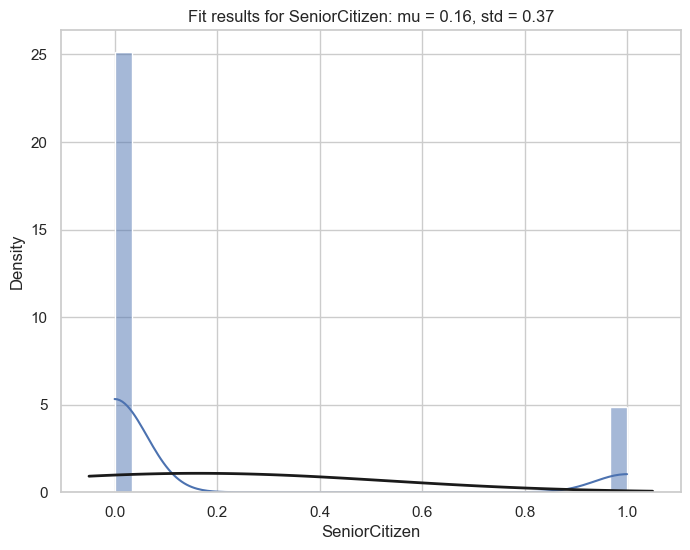

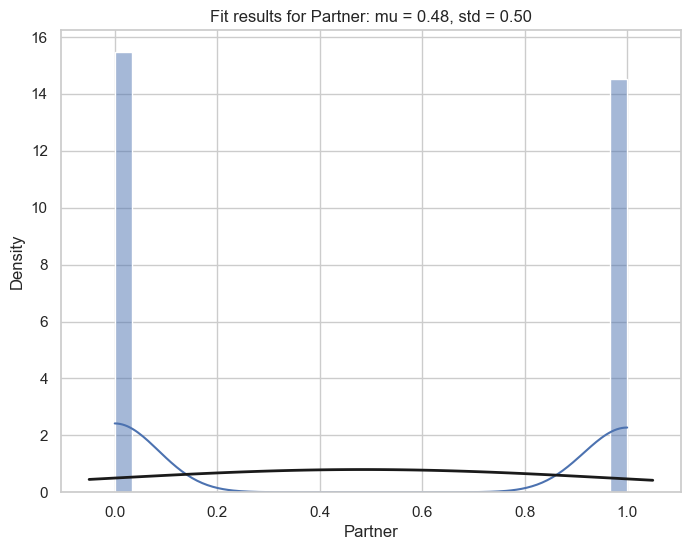

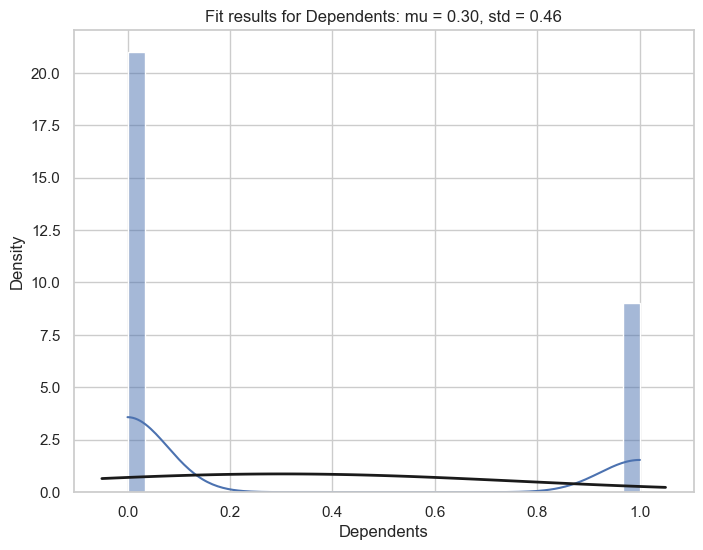

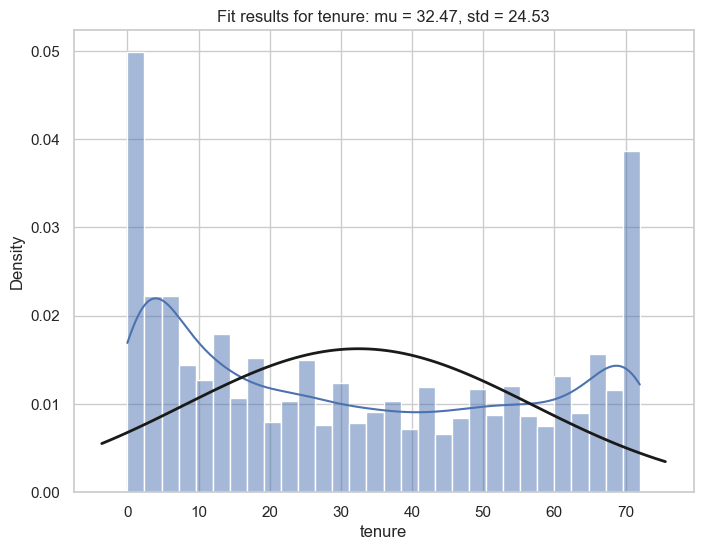

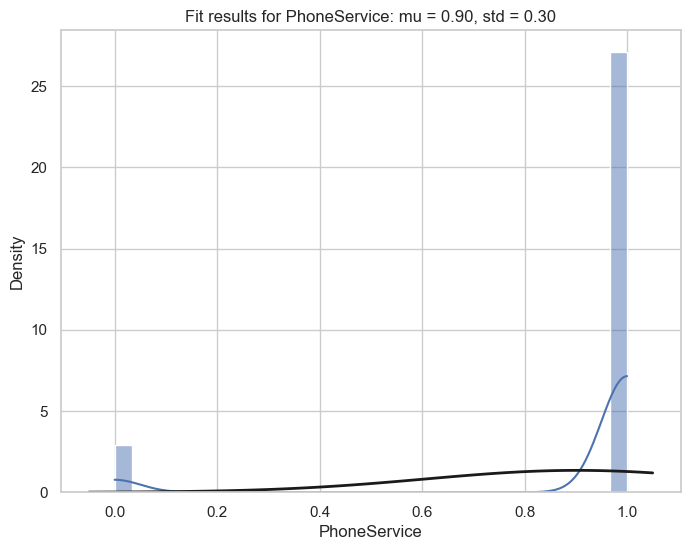

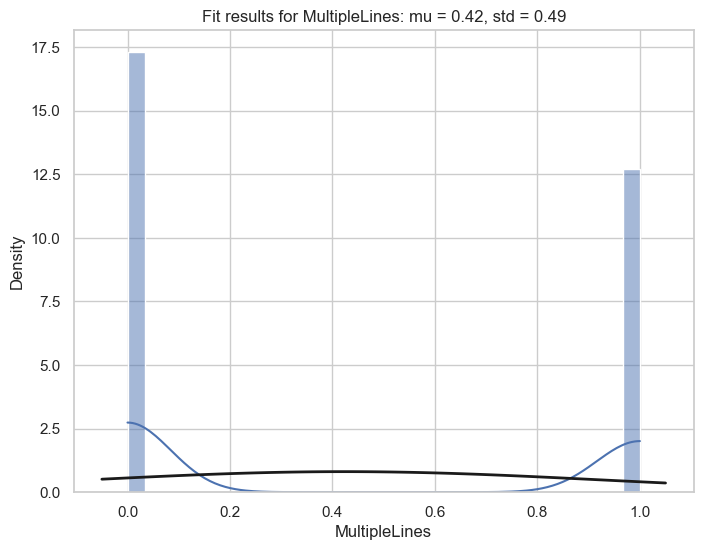

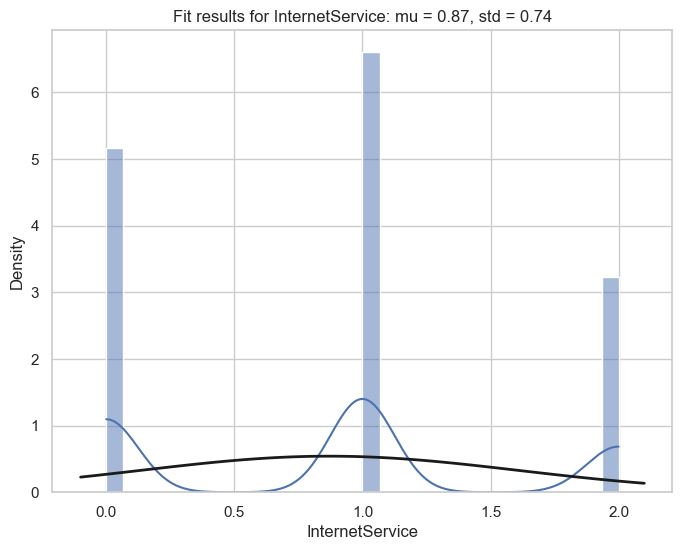

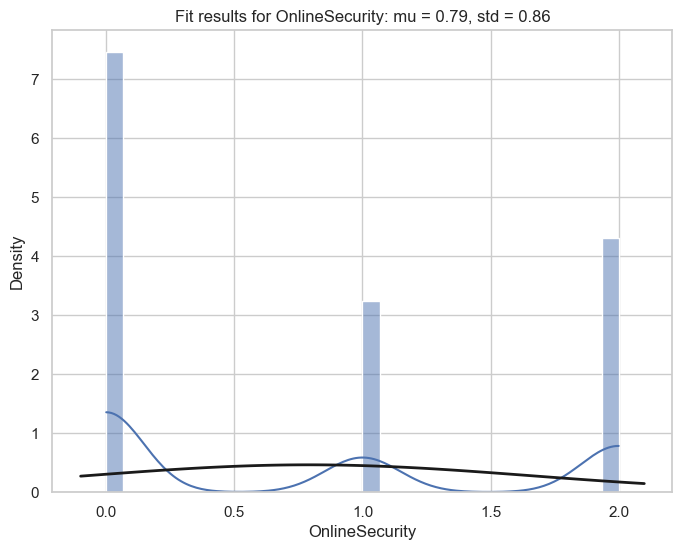

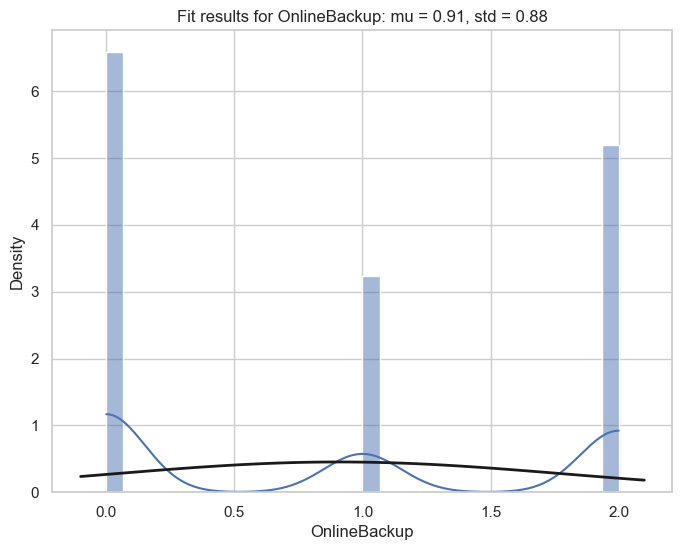

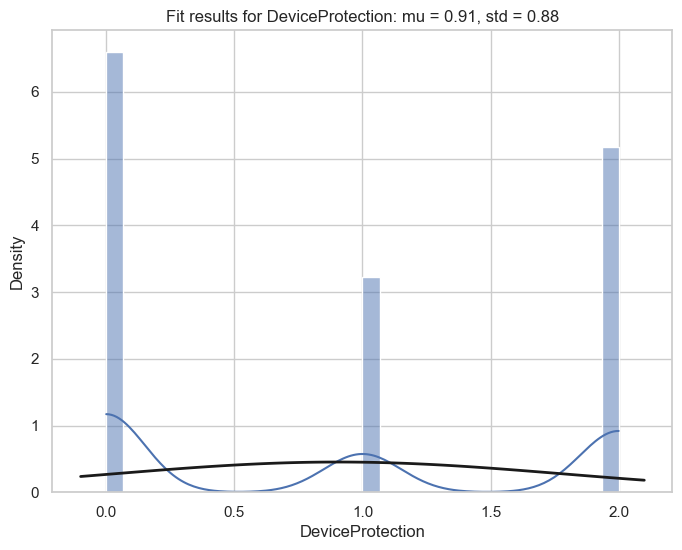

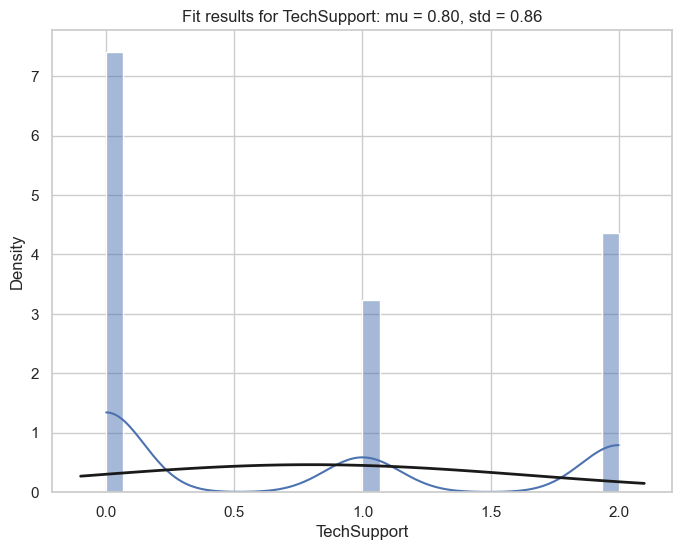

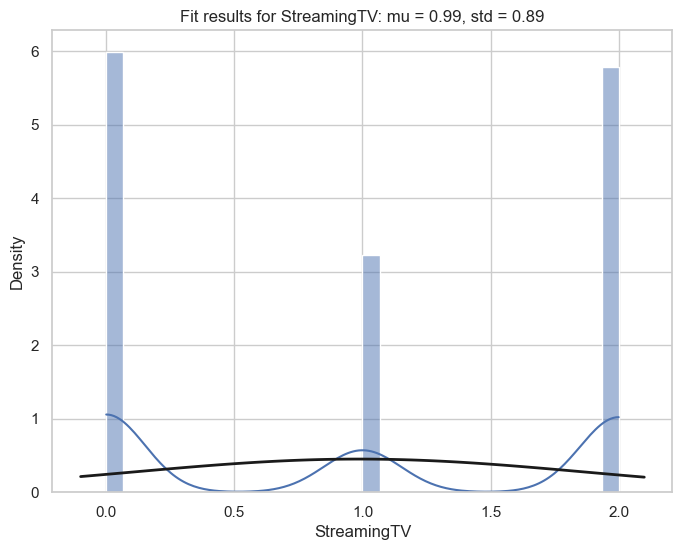

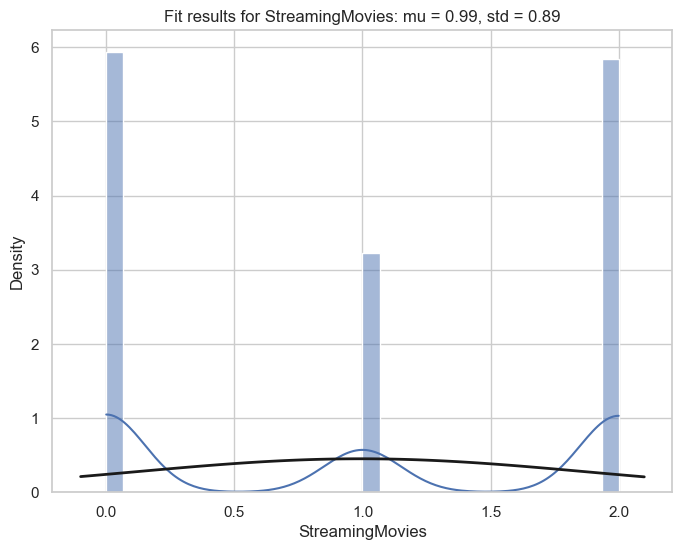

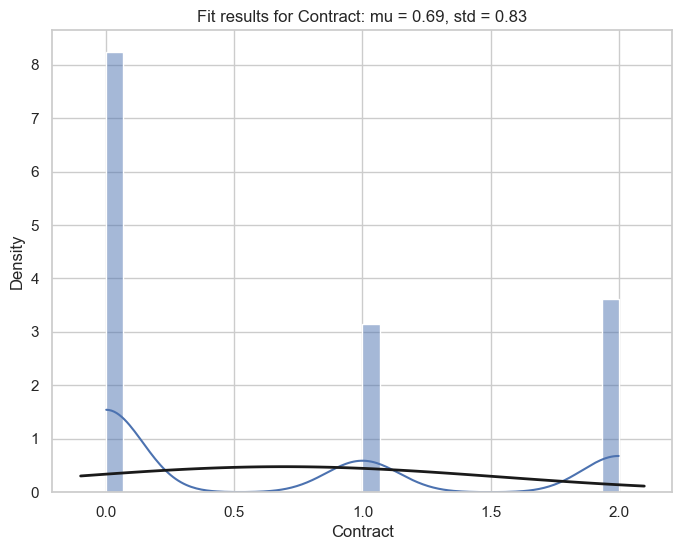

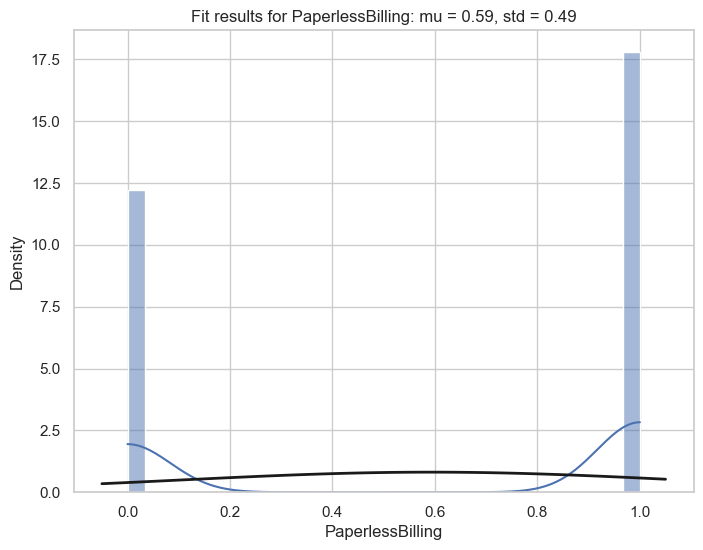

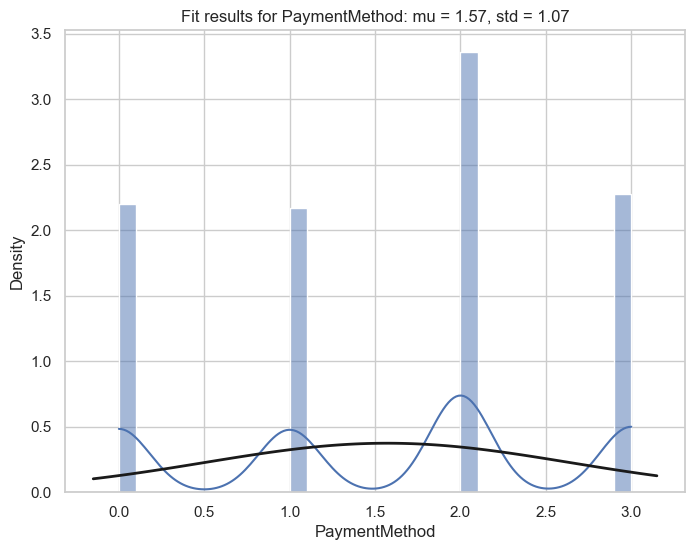

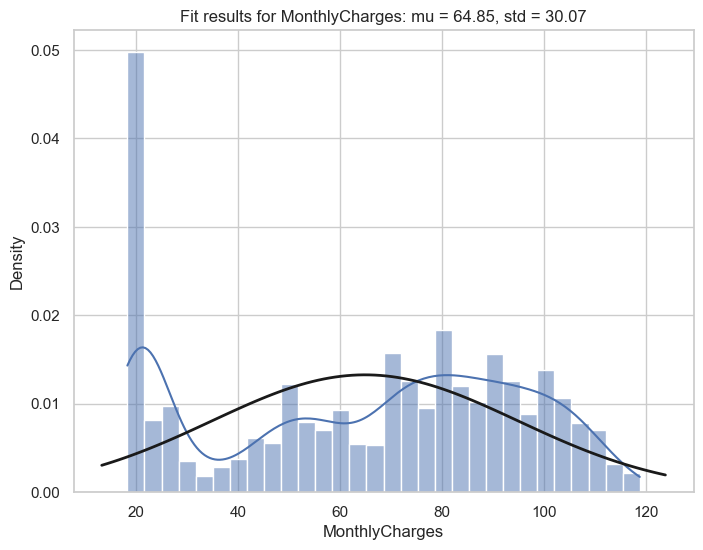

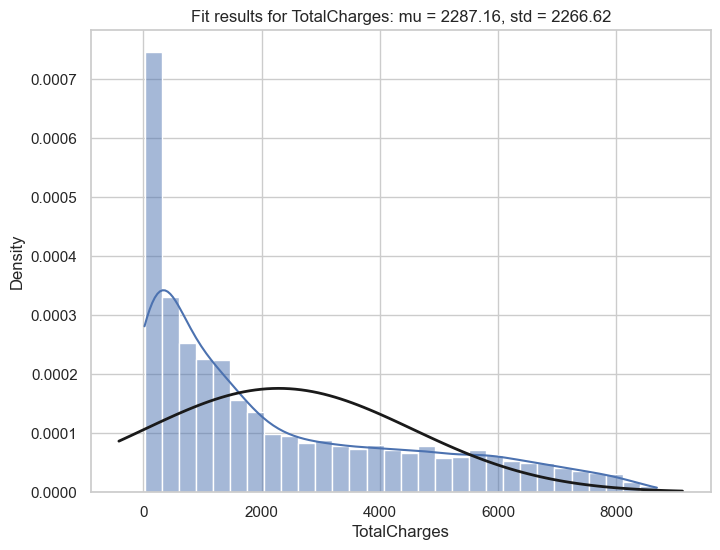

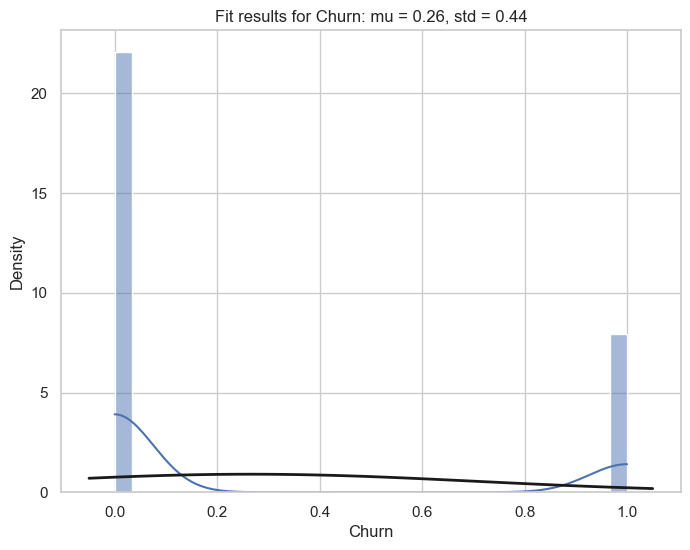

In [60]:
sns.set(style="whitegrid")

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[column], kde=True, stat="density", bins=30)
    mu, std = stats.norm.fit(data[column])
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = f"Fit results for {column}: mu = {mu:.2f}, std = {std:.2f}"
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Density')
    
    plt.show()

In [61]:
x=data.drop(["Churn"],axis=1)
y=data["Churn"]
ss=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

# Model 

In [64]:
model=Sequential()
model.add(Dense(64, input_dim=19, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [72]:
model.compile(loss="binary_crossentropy",optimizer=Adam(),metrics=["accuracy"])
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.8955 - loss: 0.2374
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.8882 - loss: 0.2369
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.9006 - loss: 0.2339
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.9004 - loss: 0.2319
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.9040 - loss: 0.2263
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step - accuracy: 0.8942 - loss: 0.2335
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 469us/step - accuracy: 0.8986 - loss: 0.2400
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8991 - loss: 0.2328
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.9031 - loss: 0.2234
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.8887 - loss: 0.2476
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.9036 - loss: 0.2235
Epoch 12/100
176/17

In [66]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

# Result

In [70]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.7418 - loss: 0.6832
Test Loss: 0.6271923780441284
Test Accuracy: 0.752136766910553


In [79]:
y_pred = model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step


In [80]:
loss, accuracy = model.evaluate(x_train, y_train)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.9491 - loss: 0.1317
Test Loss: 0.13391515612602234
Test Accuracy: 0.945868968963623


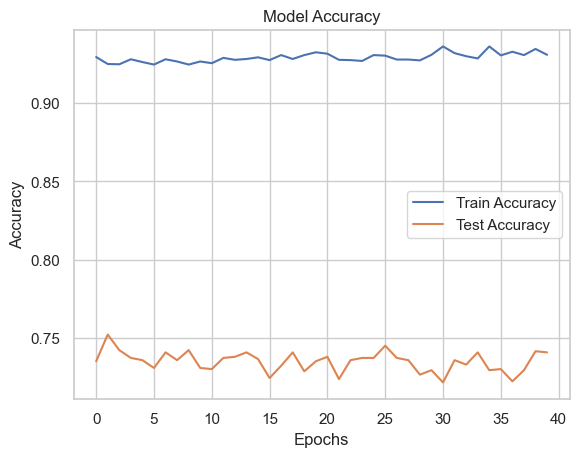

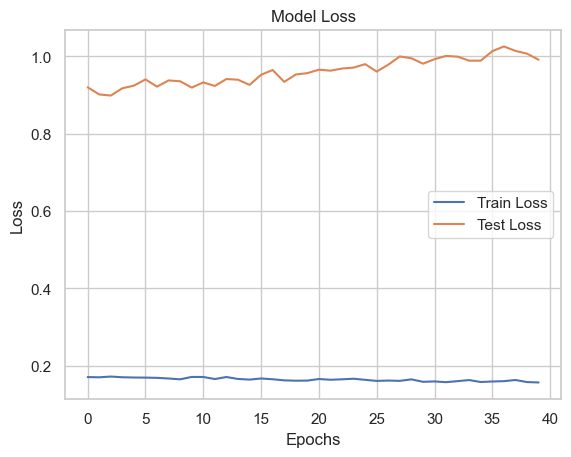

In [81]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
